<a href="https://colab.research.google.com/github/AlbertMdz/Optimizacion-Evolutiva/blob/master/ABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generacion:  0


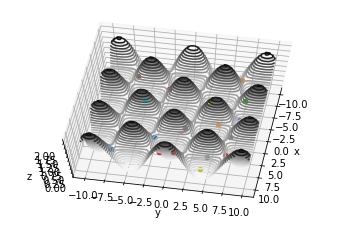

Generacion:  75


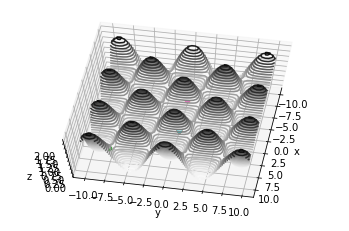

Griewank function: 
Generacion: 150
X:  0.0 Y:  0.0 F(x,y):  0.0


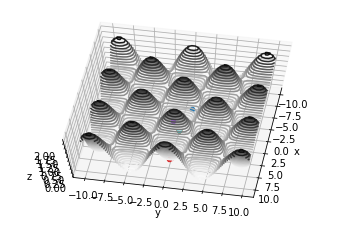

Generacion:  0


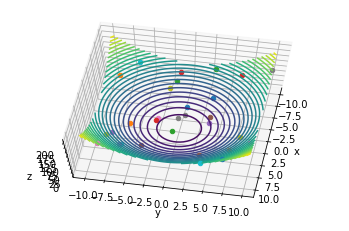

Generacion:  75


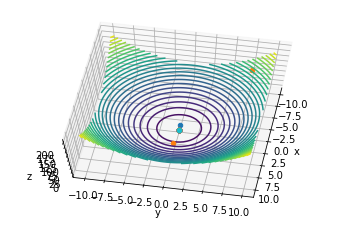

Sphere function: 
Generacion: 150
X:  0.0 Y:  0.0 F(x,y):  0.0


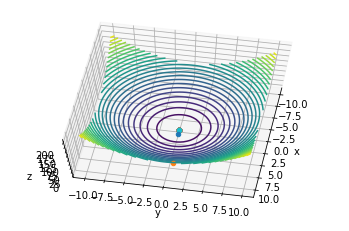

Generacion:  0


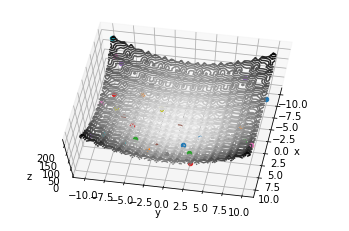

Generacion:  75


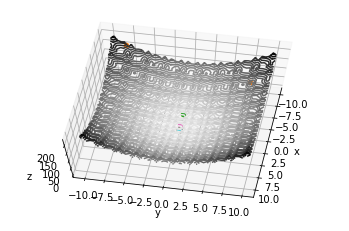

Rastrigin function: 
Generacion: 150
X:  0.0 Y:  0.0 F(x,y):  0.0


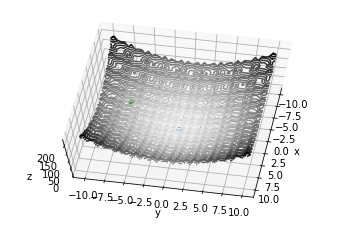

In [20]:
import math
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits import mplot3d


def f1(x, y):  # Griewank function
    sum = 0
    prod = 1
    xi = x
    sum = sum+((math.pow(xi, 2))/4000)
    prod = prod*math.cos((xi/math.sqrt(1)))
    xi = y
    sum = sum+((math.pow(xi, 2))/4000)
    prod = prod*math.cos((xi/math.sqrt(2)))
    r = sum-prod+1
    return r


def f2(x, y):  # Sphere function
    sum = 0
    xi = x
    sum = sum + math.pow(xi, 2)
    xi = y
    sum = sum + math.pow(xi, 2)
    return sum


def f3(x, y):  # Rastrigin Sphere Function
    sum = 0
    xi = x
    sum = sum + (math.pow(xi, D) - 10*math.cos(2*math.pi*xi))
    xi = y
    sum = sum + (math.pow(xi, 2) - 10*math.cos(2*math.pi*xi))
    r = 10*D + sum
    return r


def f(num, x, y):
    if num == 1:
        return f1(x, y)
    elif num == 2:
        return f2(x, y)
    else:
        return f3(x, y)


def grafica1(vX):
    # a,b son arreglos de 50 números en el rango (-2,2)
    a = np.linspace(-10, 10, RANGO)
    b = np.linspace(-10, 10, RANGO)
    #x=np.zeros((2, RANGO))

    x, y = np.meshgrid(a, b)
    # vectorize Permite que la función f(x,y) reciba como parámetros los vectores x,y
    Z = np.vectorize(f1)
    ax = plt.axes(projection='3d')
    # Dibuja la gráfica de f(x,y)
    ax.contour3D(x, y, Z(x, y), 20, cmap='Greys')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    for i in range(Pf):
        # Dibuja la población en la gráfica
        ax.scatter3D(vX[0, i], vX[1, i], f1(vX[0, i], vX[1, i]))
        ax.view_init(70, 10)
    plt.show()


def grafica2(vX):
    # a,b son arreglos de 50 números en el rango (-2,2)
    a = np.linspace(-10, 10, RANGO)
    b = np.linspace(-10, 10, RANGO)
    #x=np.zeros((2, RANGO))

    x, y = np.meshgrid(a, b)
    # vectorize Permite que la función f(x,y) reciba como parámetros los vectores x,y
    Z = np.vectorize(f2)
    ax = plt.axes(projection='3d')
    # Dibuja la gráfica de f(x,y)
    ax.contour3D(x, y, Z(x, y), 30, cmap='viridis')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    for i in range(Pf):
        # Dibuja la población en la gráfica
        ax.scatter3D(vX[0, i], vX[1, i], f2(vX[0, i], vX[1, i]))
        ax.view_init(70, 10)
    plt.show()


def grafica3(vX):
    # a,b son arreglos de 50 números en el rango (-2,2)
    a = np.linspace(-10, 10, RANGO)
    b = np.linspace(-10, 10, RANGO)
    #x=np.zeros((2, RANGO))

    x, y = np.meshgrid(a, b)
    # vectorize Permite que la función f(x,y) reciba como parámetros los vectores x,y
    Z = np.vectorize(f3)
    ax = plt.axes(projection='3d')
    # Dibuja la gráfica de f(x,y)
    ax.contour3D(x, y, Z(x, y), 30, cmap='binary')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    for i in range(Pf):
        # Dibuja la población en la gráfica
        ax.scatter3D(vX[0, i], vX[1, i], f3(vX[0, i], vX[1, i]))
        ax.view_init(70, 10)
    plt.show()


def grafica(num, vX):
    if num == 1:
        grafica1(vX)
    elif num == 2:
        grafica2(vX)
    else:
        grafica3(vX)


def rand():  # Genera vector de números random
    return random.uniform(0, 1), random.uniform(0, 1)


def mejorPosicion(num):  # Encuentra individuo con mejor posición
    best = 0
    for i in range(Pf):
        if f(num, X[0, i], X[1, i]) < f(num, X[0, best], X[1, best]):
            best = i
    return best


RANGO = 50
D = 2

POBLACION = 50
GENERACIONES = 150
L = 20
Pf = 30  # Abejas empleadas
Po = POBLACION - Pf  # Abejas observadoras

X = np.zeros((2, Pf))  # Fuentes de Alimento
li = np.zeros(Pf)
apt = np.zeros(POBLACION)   # inicializa arreglo de aptitudes

xl = np.array([-10, -10])  # límite inferior
xu = np.array([10, 10])  # Límite superior


def inicializa():
    for i in range(Pf):
        X[:, i] = xl+(xu-xl)*rand()  # Inicializa fuentes aleatoriamente


def EtapaAbejasWorkers(num):
    for i in range(Pf):
        while(True):
            k = random.randint(0, Pf-1)  # Número aleatorio  tal que i!=k
            if k != i:
                break
        vi = np.array([0, 0])
        if f(num, X[0, i], X[1, i]) < f(num, X[0, k], X[1, k]):  # Si f(xi) < f(xk)
            for j in range(D-1):
                r = random.uniform(0, 1)  # random [0,1]
                vi[j] = X[j, i]+r*(X[j, i]-X[j, k])  # cij = xij + r*(xij-xkj)
        else:
            for j in range(D-1):
                r = random.uniform(0, 1)  # random [0,1]
                vi[j] = X[j, i]+r*(X[j, k]-X[j, i])  # cij = xij + r*(xkj-xij)
        if f(num, vi[0], vi[1]) < f(num, X[0, i], X[1, i]):  # si f(vi) < f(xi)
            X[:, i] = vi  # xi = vi
            li[i] = 0  # li =0
        else:
            li[i] += 1  # li = li+1


def EtapaAbejasUNLOOKERS(num):
    m = mejorPosicion(num)
    for i in range(Po):
        while(True):
            k = random.randint(0, Pf-1)  # Número aleatorio  tal que i!=k
            if k != m:
                break
        vm = np.array([0, 0])
        for j in range(D-1):
            r = random.uniform(0, 1)  # random [0,1]
            vm[j] = X[j, m] + r*(X[j, m]-X[j, k])  # vmj = xmj + r*(xmj - xkj)
        if f(num, vm[0], vm[1]) < f(num, X[0, m], X[1, m]):  # si f(vm) < f(xm)
            X[:, m] = vm  # xm = vm
            li[m] = 0  # lm = 0
        else:
            li[m] += 1  # lm = lm +1

def EtapaAbejaSCOUT():
    for i in range(Pf):
        if li[i] > L:
            X[:, i] = xl+(xu-xl)*rand()
            li[i] = 0


def AlgoritmoABC(num):
    inicializa()
    for i in range(GENERACIONES):
        if(i % 75 == 0):
            print("Generacion: ", i)
            grafica(num, X)  # Grafíca cada 75 Generaciones
        EtapaAbejasWorkers(num)
        EtapaAbejasUNLOOKERS(num)
        EtapaAbejaSCOUT()
        


AlgoritmoABC(1)
best = mejorPosicion(1)
print("Griewank function: ")
# Imprime la mejor posición global de la última generación
print("Generacion: 150")
print("X: ", X[0, best], "Y: ", X[1, best],
      "F(x,y): ", f(1, X[0, best], X[1, best]))

grafica(1, X)

AlgoritmoABC(2)
best = mejorPosicion(2)
print("Sphere function: ")
# Imprime la mejor posición global de la última generación
print("Generacion: 150")
print("X: ", X[0, best], "Y: ", X[1, best],
      "F(x,y): ", f(2, X[0, best], X[1, best]))
grafica(2, X)

AlgoritmoABC(3)
best = mejorPosicion(3)
print("Rastrigin function: ")
# Imprime la mejor posición global de la última generación
print("Generacion: 150")
print("X: ", X[0, best], "Y: ", X[1, best],
      "F(x,y): ", f(3, X[0, best], X[1, best]))
grafica(3, X)